<a href="https://colab.research.google.com/github/ehpub/ML-with-Python/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_with_python_010_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8_%ED%8F%89%EA%B0%80_%EB%8F%84%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[설명](https://ehpub.co.kr/%eb%b6%84%eb%a5%98-%eb%aa%a8%eb%8d%b8-%ed%8f%89%ea%b0%80-%eb%8f%84%ea%b5%ac-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d-with-%ed%8c%8c%ec%9d%b4%ec%8d%ac/)

## 분류 모델 평가 도구

In [3]:
from sklearn.metrics import confusion_matrix #혼동 행렬
from sklearn.metrics import accuracy_score #적합도
from sklearn.metrics import recall_score #리콜(재현율, 민감도)
from sklearn.metrics import precision_score #정밀도
from sklearn.metrics import f1_score #F1 점
from sklearn.metrics import class_likelihood_ratios #우도
from sklearn.metrics import roc_auc_score #ROC AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay #ROC CURVE 시각화
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score #교차 검증 점수
from sklearn.metrics import classification_report #분류 레포트

from sklearn.linear_model import LogisticRegression #로지스틱 회귀
from sklearn.svm import SVC #서포트 벡터 머신
from sklearn.neighbors import KNeighborsClassifier #K 최근접 이웃
from sklearn.tree import DecisionTreeClassifier #결정 트리
from sklearn.ensemble import RandomForestClassifier #랜덤 포리스트
from sklearn.datasets import load_breast_cancer #유방암 데이터
from sklearn.datasets import fetch_covtype #산림 피복 데이터
from sklearn.model_selection import train_test_split #학습 및 테스트 데이터 분리
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')#경고 무시하기

## 혼동 행렬

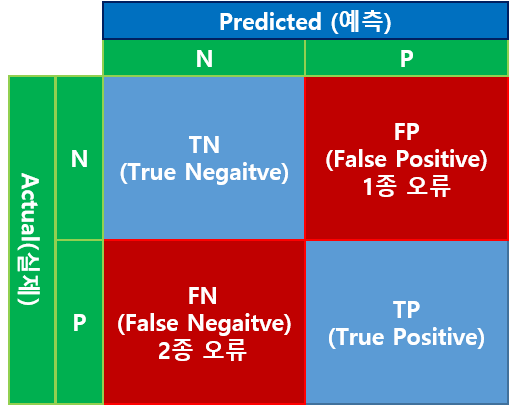

In [4]:
actual    = np.array([0,0,0,0,0,0,0,0,0,0,  #Negative
                      1,1,1,1,1,1,1,1,1,1]) #Positive
predicted = np.array([0,0,0,0,1,0,0,0,1,1,  #Negative
                      1,1,1,1,0,0,1,1,1,1]) #Positive
print(confusion_matrix(actual,predicted))

[[7 3]
 [2 8]]


## Accuracy, Recall, Precision, F1, likelihood

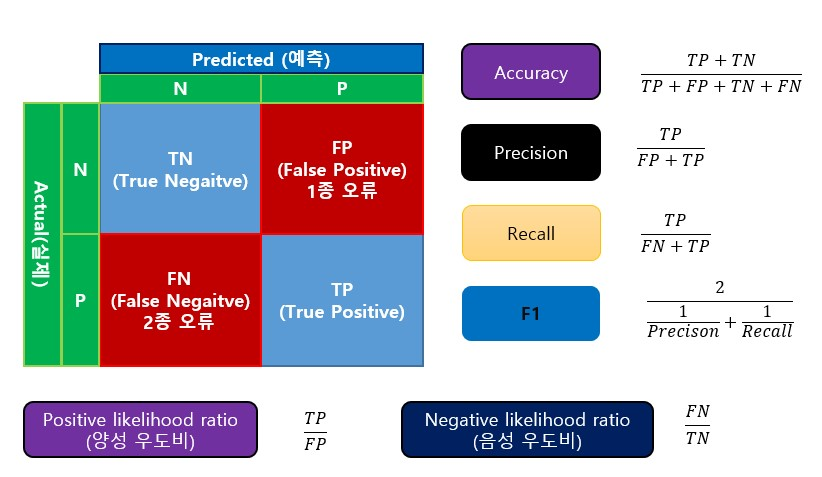

In [5]:
print("accuracy:",accuracy_score(actual,predicted)) #(7+8)/(7+3+2+8)=15/20

accuracy: 0.75


In [6]:
print("precision:",precision_score(actual,predicted)) #8/(3+8) = 8/11

precision: 0.7272727272727273


In [7]:
print("recall:",recall_score(actual,predicted)) #8/(2+8) = 8/10

recall: 0.8


In [8]:
print("f1:",f1_score(actual,predicted)) #2/(1/recall+1/precison) = 16/21

f1: 0.761904761904762


In [9]:
lh = class_likelihood_ratios(actual,predicted)
print("positive likelihood",lh[0]) #8/3
print("negative likelihood",lh[1]) #2/7

positive likelihood 2.6666666666666665
negative likelihood 0.2857142857142857


In [12]:
print(f"roc auc:",roc_auc_score(actual,predicted))

roc auc: 0.75


In [15]:
actual    = np.array([0,0,0,0,0,0,0,0,0,0,  #Negative
                      1,1,1,1,1,1,1,1,1,1]) #Positive
predicted = np.array([0,0,0,0,1,0,0,0,1,1,  #Negative
                      1,1,1,1,0,0,1,1,1,1]) #Positive
print("confusion  matrix\n",confusion_matrix(actual,predicted))
print("accuracy:",accuracy_score(actual,predicted)) #(7+8)/(7+3+2+8)=15/20
print("precision:",precision_score(actual,predicted)) #8/(3+8) = 8/11
print("recall:",recall_score(actual,predicted)) #8/(2+8) = 8/10
print("precision:",precision_score(actual,predicted)) #8/(3+8) = 8/11
print("f1:",f1_score(actual,predicted)) #2/(1/recall+1/precison) = 16/21
lh = class_likelihood_ratios(actual,predicted)
print("positive likelihood",lh[0]) #8/3
print("negative likelihood",lh[1]) #2/7
print(f"roc auc:",roc_auc_score(actual,predicted))

confusion  matrix
 [[7 3]
 [2 8]]
accuracy: 0.75
precision: 0.7272727272727273
recall: 0.8
precision: 0.7272727272727273
f1: 0.761904761904762
positive likelihood 2.6666666666666665
negative likelihood 0.2857142857142857
roc auc: 0.75


## 유방암 데이터 분류(이진 분류)

In [16]:
cancer = load_breast_cancer()
data = cancer.data
target = cancer.target
print(np.unique(target,return_counts=True))

(array([0, 1]), array([212, 357]))


In [21]:
x_train_org,x_test, y_train_org,y_test = train_test_split(data[:30000],target[:30000])
x_train,x_val, y_train,y_val = train_test_split(x_train_org,y_train_org)
print(y_train.shape, y_val.shape, y_test.shape)

(319,) (107,) (143,)


In [22]:
mms = MinMaxScaler()
mms.fit(data)
x_train_s = mms.transform(x_train)
x_val_s = mms.transform(x_val)
x_test_s = mms.transform(x_test)

In [23]:
model1 = LogisticRegression() #로지스틱 회귀
model2 = SVC() #서포트 벡터 머신
model3 = KNeighborsClassifier() #K 최근접 이웃
model4 = DecisionTreeClassifier() #결정 트리
model5 = RandomForestClassifier() #랜덤 포레스

In [24]:
for model in [model1,model2,model3, model4, model5]:
  print(model.__class__.__name__,"###")
  model.fit(x_train,y_train)
  pred_train = model.predict(x_train)
  print("학습 데이터")
  print(confusion_matrix(y_train,pred_train))
  print(f"\t적합도:{accuracy_score(y_train,pred_train):.2f}")
  print(f"\t리콜:{recall_score(y_train,pred_train):.2f}")
  print(f"\t정밀도:{precision_score(y_train,pred_train):.2f}")
  pred_val = model.predict(x_val)
  print("검증 데이터")
  print(confusion_matrix(y_val,pred_val))
  print(f"\t적합도:{accuracy_score(y_val,pred_val):.2f}")
  print(f"\t리콜:{recall_score(y_val,pred_val):.2f}")
  print(f"\t정밀도:{precision_score(y_val,pred_val):.2f}")

LogisticRegression ###
학습 데이터
[[108   9]
 [  5 197]]
	적합도:0.96
	리콜:0.98
	정밀도:0.96
검증 데이터
[[32  4]
 [ 3 68]]
	적합도:0.93
	리콜:0.96
	정밀도:0.94
SVC ###
학습 데이터
[[ 91  26]
 [  3 199]]
	적합도:0.91
	리콜:0.99
	정밀도:0.88
검증 데이터
[[28  8]
 [ 3 68]]
	적합도:0.90
	리콜:0.96
	정밀도:0.89
KNeighborsClassifier ###
학습 데이터
[[103  14]
 [  7 195]]
	적합도:0.93
	리콜:0.97
	정밀도:0.93
검증 데이터
[[33  3]
 [ 4 67]]
	적합도:0.93
	리콜:0.94
	정밀도:0.96
DecisionTreeClassifier ###
학습 데이터
[[117   0]
 [  0 202]]
	적합도:1.00
	리콜:1.00
	정밀도:1.00
검증 데이터
[[33  3]
 [ 7 64]]
	적합도:0.91
	리콜:0.90
	정밀도:0.96
RandomForestClassifier ###
학습 데이터
[[117   0]
 [  0 202]]
	적합도:1.00
	리콜:1.00
	정밀도:1.00
검증 데이터
[[34  2]
 [ 4 67]]
	적합도:0.94
	리콜:0.94
	정밀도:0.97


In [26]:
for model in [model1,model2,model3, model4, model5]:
  print(model.__class__.__name__,"###")
  model.fit(x_train_s,y_train)
  pred_train = model.predict(x_train_s)
  print("학습 데이터")
  print(confusion_matrix(y_train,pred_train))
  print(f"\t적합도:{accuracy_score(y_train,pred_train):.2f}")
  print(f"\t리콜:{recall_score(y_train,pred_train):.2f}")
  print(f"\t정밀도:{precision_score(y_train,pred_train):.2f}")
  pred_val = model.predict(x_val_s)
  print("검증 데이터")
  print(confusion_matrix(y_val,pred_val))
  print(f"\t적합도:{accuracy_score(y_val,pred_val):.2f}")
  print(f"\t리콜:{recall_score(y_val,pred_val):.2f}")
  print(f"\t정밀도:{precision_score(y_val,pred_val):.2f}")

LogisticRegression ###
학습 데이터
[[106  11]
 [  0 202]]
	적합도:0.97
	리콜:1.00
	정밀도:0.95
검증 데이터
[[31  5]
 [ 0 71]]
	적합도:0.95
	리콜:1.00
	정밀도:0.93
SVC ###
학습 데이터
[[113   4]
 [  0 202]]
	적합도:0.99
	리콜:1.00
	정밀도:0.98
검증 데이터
[[34  2]
 [ 1 70]]
	적합도:0.97
	리콜:0.99
	정밀도:0.97
KNeighborsClassifier ###
학습 데이터
[[109   8]
 [  3 199]]
	적합도:0.97
	리콜:0.99
	정밀도:0.96
검증 데이터
[[31  5]
 [ 2 69]]
	적합도:0.93
	리콜:0.97
	정밀도:0.93
DecisionTreeClassifier ###
학습 데이터
[[117   0]
 [  0 202]]
	적합도:1.00
	리콜:1.00
	정밀도:1.00
검증 데이터
[[33  3]
 [ 6 65]]
	적합도:0.92
	리콜:0.92
	정밀도:0.96
RandomForestClassifier ###
학습 데이터
[[117   0]
 [  0 202]]
	적합도:1.00
	리콜:1.00
	정밀도:1.00
검증 데이터
[[34  2]
 [ 5 66]]
	적합도:0.93
	리콜:0.93
	정밀도:0.97


In [28]:
def total_score_classifier(actual,predict,average='binary'):
  print(confusion_matrix(actual,predict))
  print(f"\t적합도:{accuracy_score(actual,predict):.2f}")
  print(f"\t리콜:{recall_score(actual,predict,average=average):.2f}")
  print(f"\t정밀도:{precision_score(actual,predict,average=average):.2f}")
  print(f"\tF1:{f1_score(actual,predict,average=average):.2f}")

In [29]:
def draw_roc_auc(actual,predict_proba):
  print(f"\troc auc:{roc_auc_score(actual,predict_proba[:,1]):.2f}")
  fpr, tpr, thresholds = roc_curve(actual, predict_proba[:,1])
  roc_auc = auc(fpr, tpr)
  display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
  display.plot()

LogisticRegression ###
학습 데이터
[[108   9]
 [  5 197]]
	적합도:0.96
	리콜:0.98
	정밀도:0.96
	F1:0.97
검증 데이터
[[32  4]
 [ 3 68]]
	적합도:0.93
	리콜:0.96
	정밀도:0.94
	F1:0.95
테스트 데이터
[[56  3]
 [ 2 82]]
	적합도:0.97
	리콜:0.98
	정밀도:0.96
	F1:0.97
	roc auc:1.00


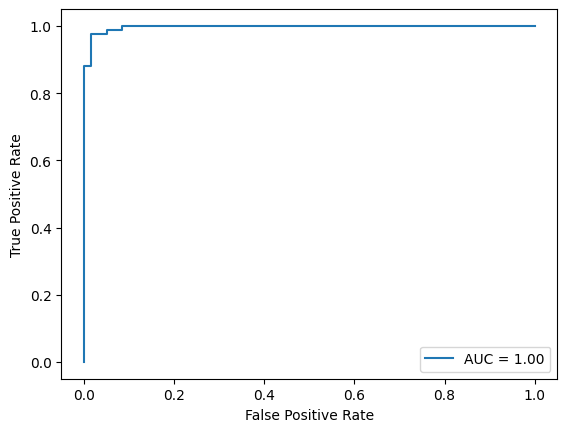

In [30]:
final_model = LogisticRegression() #로지스틱 회귀
print(final_model.__class__.__name__,"###")
final_model.fit(x_train,y_train)
pred_train = final_model.predict(x_train)
print("학습 데이터")
total_score_classifier(y_train,pred_train)

pred_val = final_model.predict(x_val)
print("검증 데이터")
total_score_classifier(y_val,pred_val)

pred_test = final_model.predict(x_test)
print("테스트 데이터")
total_score_classifier(y_test,pred_test)

pred_test_proba = final_model.predict_proba(x_test)
draw_roc_auc(y_test, pred_test_proba)

## 산림 피복 데이터 분류(다중 분류)

[데이터 정보](http://archive.ics.uci.edu/dataset/31/covertype)

In [32]:
covtype = fetch_covtype()
data = covtype.data
target = covtype.target

1 - Neota

2 - Comanche Peak

3 - Cache la Poudre

4 - cottonwood

5 - spruce-fir

6 - douglar-fir

7 - etc

In [33]:
np.unique(covtype.target,return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([211840, 283301,  35754,   2747,   9493,  17367,  20510]))

In [34]:
np.unique(target[:30000],return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([ 4772, 14192,  2160,  2160,  2396,  2160,  2160]))

In [37]:
x_train_org,x_test, y_train_org,y_test = train_test_split(data[:30000],target[:30000])
x_train,x_val, y_train,y_val = train_test_split(x_train_org,y_train_org)
print(y_train.shape, y_val.shape, y_test.shape)

(16875,) (5625,) (7500,)


## 소요 시간 및 적합도 평가

In [ ]:
model1 = LogisticRegression() #선형
model2 = SVC() #서포트 벡터 머신
model3 = KNeighborsClassifier() #K 최근접 이웃
model4 = DecisionTreeClassifier() #결정 트리
model5 = RandomForestClassifier() #랜덤 포레스트

In [ ]:
for model in [model1, model2,model3, model4, model5]:
  ex_times=[]
  print(model.__class__.__name__,"###")
  start = time.time()
  model.fit(x_train,y_train)
  stop = time.time()
  ex_times.append(stop - start)

  start = time.time()
  pred_train = model.predict(x_train)
  stop = time.time()
  ex_times.append(stop - start)
  print("학습 데이터 적합도:",accuracy_score(y_train,pred_train))
  start = time.time()
  pred_val = model.predict(x_val)
  stop = time.time()
  ex_times.append(stop - start)
  print("검증 데이터 적합도:",accuracy_score(y_val,pred_val))
  print("소요 시간:",np.round(ex_times,3))

LogisticRegression ###
학습 데이터 적합도: 0.5990518518518518
검증 데이터 적합도: 0.6046222222222222
소요 시간: [0.838 0.003 0.001]
SVC ###
학습 데이터 적합도: 0.7111111111111111
검증 데이터 적합도: 0.7096888888888889
소요 시간: [ 8.545 11.986  3.805]
KNeighborsClassifier ###
학습 데이터 적합도: 0.922074074074074
검증 데이터 적합도: 0.8624
소요 시간: [0.002 1.486 0.528]
DecisionTreeClassifier ###
학습 데이터 적합도: 1.0
검증 데이터 적합도: 0.8522666666666666
소요 시간: [0.183 0.003 0.002]
RandomForestClassifier ###
학습 데이터 적합도: 1.0
검증 데이터 적합도: 0.9016888888888889
소요 시간: [2.581 0.306 0.116]


## 스케일 변환 후 적합도 테스트

In [38]:
mms = MinMaxScaler()
mms.fit(data)
x_train_s = mms.transform(x_train)
x_val_s = mms.transform(x_val)
x_test_s = mms.transform(x_test)

In [36]:
model3 = KNeighborsClassifier() #K 최근접 이웃
model4 = DecisionTreeClassifier() #결정 트리
model5 = RandomForestClassifier() #랜덤 포레스트

In [ ]:
for model in [model3, model4, model5]:
  print(model.__class__.__name__,"###")
  model.fit(x_train_s,y_train)
  pred_train = model.predict(x_train_s)
  print("학습 데이터 적합도:",accuracy_score(y_train,pred_train))
  pred_val = model.predict(x_val_s)
  print("검증 데이터 적합도:",accuracy_score(y_val,pred_val))

KNeighborsClassifier ###
학습 데이터 적합도: 0.9031111111111111
검증 데이터 적합도: 0.8602666666666666
DecisionTreeClassifier ###
학습 데이터 적합도: 1.0
검증 데이터 적합도: 0.8608
RandomForestClassifier ###
학습 데이터 적합도: 1.0
검증 데이터 적합도: 0.9109333333333334


## 최종 확

In [ ]:
final_model = RandomForestClassifier() #랜덤 포리스트 회귀
print(final_model.__class__.__name__,"###")
final_model.fit(x_train,y_train)
pred_train = final_model.predict(x_train)
print("학습 데이터")
total_score_classifier(y_train,pred_train,average='macro')

pred_val = final_model.predict(x_val)
print("검증 데이터")
total_score_classifier(y_val,pred_val,average='macro')

pred_test = final_model.predict(x_test)
print("테스트 데이터")
total_score_classifier(y_test,pred_test,average='macro')
print(classification_report(y_test,pred_test))

RandomForestClassifier ###
학습 데이터
[[2645    0    0    0    0    0    0]
 [   0 7974    0    0    0    0    0]
 [   0    0 1219    0    0    0    0]
 [   0    0    0 1228    0    0    0]
 [   0    0    0    0 1348    0    0]
 [   0    0    0    0    0 1214    0]
 [   0    0    0    0    0    0 1247]]
	적합도:1.00
	리콜:1.00
	정밀도:1.00
	F1:1.00
검증 데이터
[[ 712  144    1    0   14    0   22]
 [  88 2508   15    0   43   14    5]
 [   0    1  325   20    4   47    0]
 [   0    0    8  385    0    2    0]
 [   1   30    6    0  410    7    0]
 [   0    0   48   11    6  352    0]
 [  14    2    0    0    0    0  380]]
	적합도:0.90
	리콜:0.89
	정밀도:0.88
	F1:0.89
테스트 데이터
[[ 958  225    0    0   15    3   33]
 [ 121 3340   12    0   54   13    5]
 [   0    3  418   33   10   80    0]
 [   0    0   12  519    0    6    0]
 [   0   40   10    0  535    9    0]
 [   1    1   54   15    6  452    0]
 [  17    1    0    0    2    0  497]]
	적합도:0.90
	리콜:0.88
	정밀도:0.88
	F1:0.88
              precision    recall  f

In [39]:
from sklearn.preprocessing import OneHotEncoder
y_test_one = OneHotEncoder().fit_transform(y_test.reshape(-1,1)).toarray()
print(y_test_one.shape)

(7500, 7)


In [ ]:
print(y_test[:10])
print(y_test_one[:10])

[2 1 6 1 2 2 2 2 6 4]
[[0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


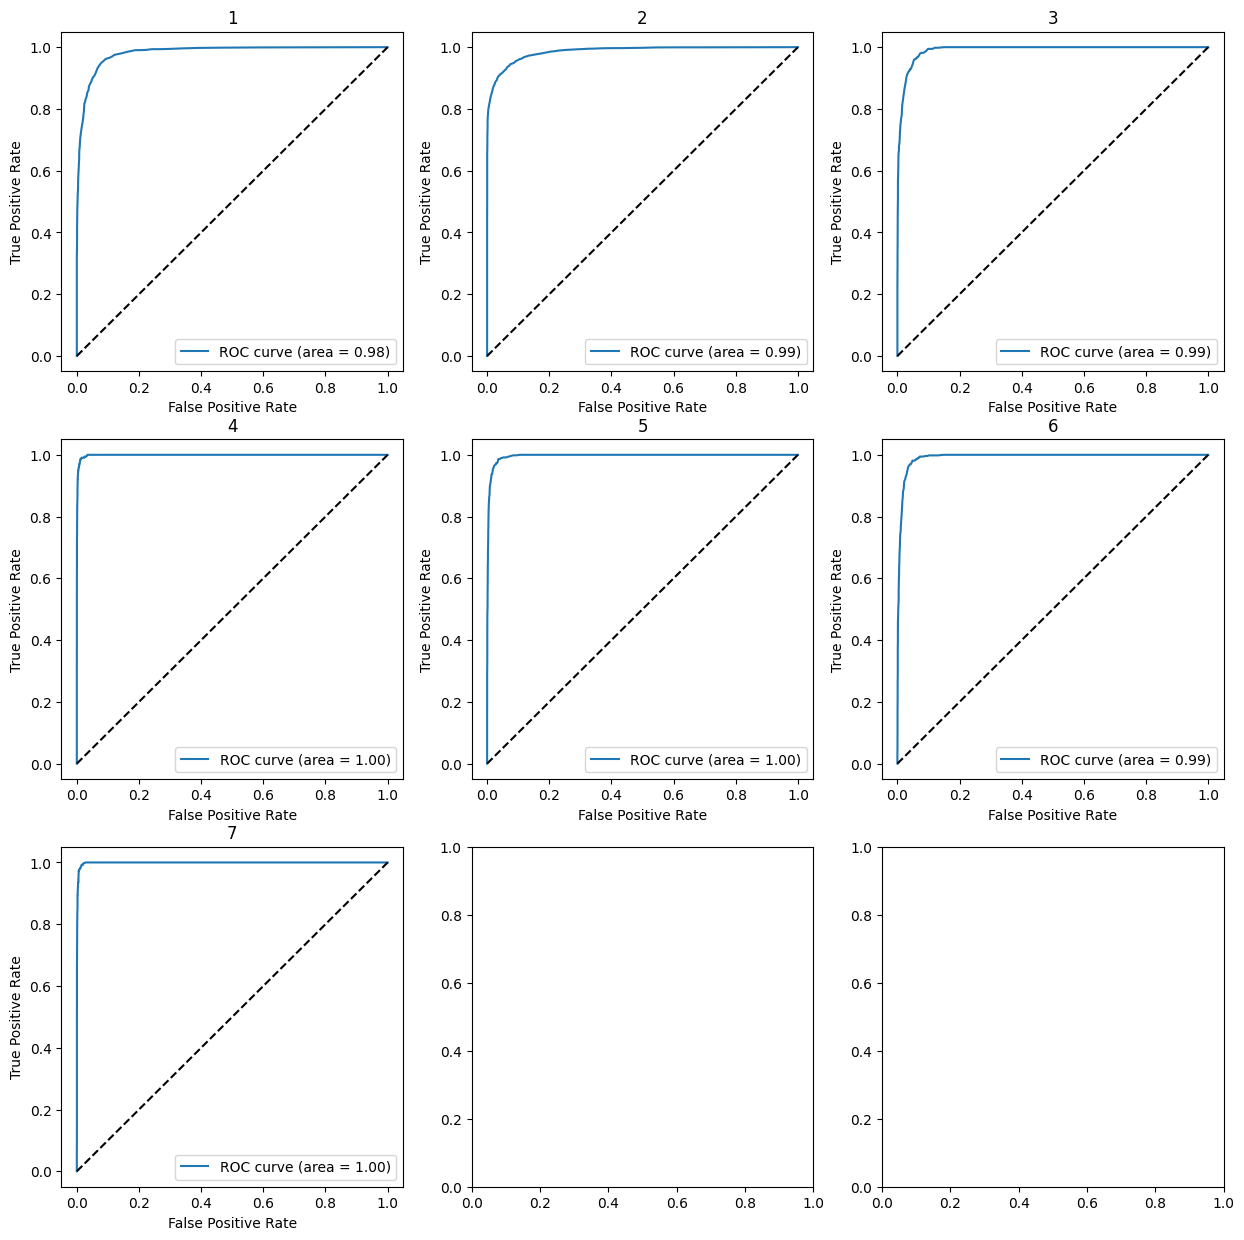

roc_auc_score:  0.9919409462337846


In [ ]:
pred_test_proba = final_model.predict_proba(x_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test_one[:,i], pred_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fig, axs = plt.subplots(nrows=3,ncols=3,figsize=(15,15))
for i in range(7):
    ax = axs[i//3,i%3]
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(str(i+1))
    ax.legend(loc="lower right")
plt.show()

print("roc_auc_score: ", roc_auc_score(y_test_one, pred_test_proba, multi_class='raise'))